# Introduction

We'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

- What is the most enormous LEGO set ever created and how many parts did it have?

- How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

- Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?

- When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?

- Did LEGO sets grow in size and complexity over time? Do older Lego sets tend to have more or fewer parts than newer sets?

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.


![Lego Block](./assets/bricks.jpg)


# Constant


In [1]:
dataset_year = 2022


In [2]:
set_url = f"data/{dataset_year}/sets.csv"
color_url = f"data/{dataset_year}/colors.csv"
theme_url = f"data/{dataset_year}/themes.csv"


# Import Statements


In [3]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

cf.go_offline()
sns.set_theme(style="darkgrid", font_scale=1.4)


# Reading Data


In [4]:
df_sets = pd.read_csv(set_url)
df_colors = pd.read_csv(color_url)
df_themes = pd.read_csv(theme_url)


# Data Exploration


**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.


In [5]:
df_colors.head()


,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [6]:
df_colors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        216 non-null    int64 
 1   name      216 non-null    object
 2   rgb       216 non-null    object
 3   is_trans  216 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.9+ KB


In [7]:
df_colors["rgb"].nunique(), df_colors["name"].nunique()


(188, 216)

**Challenge**: Find the number of transparent colours where `is_trans == 't'` versus the number of opaque colours where `is_trans == 'f'`. See if you can accomplish this in two different ways.


In [8]:
df_colors["is_trans"].value_counts()


f    178
t     38
Name: is_trans, dtype: int64

In [9]:
df_colors.groupby("is_trans").count()


,id,name,rgb
is_trans,,,
f,178,178,178
t,38,38,38


In [10]:
df_colors[df_colors["is_trans"] == "f"].count()


id          178
name        178
rgb         178
is_trans    178
dtype: int64

### Understanding LEGO Themes vs. LEGO Sets


Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

![Theme](./assets/lego_themes.png)


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

![Set](./assets/lego_sets.png)


The `sets.csv` data contains a list of sets over the years and the number of parts that each of these sets contained.


In [11]:
df_sets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19435 entries, 0 to 19434
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    19435 non-null  object
 1   name       19435 non-null  object
 2   year       19435 non-null  int64 
 3   theme_id   19435 non-null  int64 
 4   num_parts  19435 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 759.3+ KB


In [12]:
df_sets.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


**Challenge**: In which year were the first LEGO sets released and what were these sets called?


In [13]:
df_sets.sort_values("year").head()


,set_num,name,year,theme_id,num_parts
11706,700.2-1,Large Gift Set (ABB),1949,365,178
11711,700.3-1,Medium Gift Set (ABB),1949,365,142
11693,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11717,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
11716,700.A-1,Small Brick Set (ABB),1949,371,24


In [14]:
df_sets.loc[df_sets["year"].idxmin()]


set_num                         700.1-1
name         Extra-Large Gift Set (ABB)
year                               1949
theme_id                            365
num_parts                           142
Name: 11693, dtype: object

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?


In [15]:
df_sets[df_sets["year"] == 1949]


,set_num,name,year,theme_id,num_parts
11693,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11706,700.2-1,Large Gift Set (ABB),1949,365,178
11711,700.3-1,Medium Gift Set (ABB),1949,365,142
11716,700.A-1,Small Brick Set (ABB),1949,371,24
11717,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.


In [16]:
df_sets.nlargest(5, "num_parts")


,set_num,name,year,theme_id,num_parts
4003,31203-1,World Map,2021,709,11695
18380,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
369,10294-1,Titanic,2021,673,9092
350,10276-1,Colosseum,2020,673,9036
13554,75192-1,Millennium Falcon,2017,171,7541


In [17]:
df_sets.sort_values("num_parts", ascending=False).head()


,set_num,name,year,theme_id,num_parts
4003,31203-1,World Map,2021,709,11695
18380,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
369,10294-1,Titanic,2021,673,9092
350,10276-1,Colosseum,2020,673,9036
13554,75192-1,Millennium Falcon,2017,171,7541


**Challenge**: Use `.groupby()` and `.count()` to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2021?


In [18]:
df_sets_yoy = df_sets.groupby("year").count()
df_sets_yoy


,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,29,29,29,29
...,...,...,...,...
2018,883,883,883,883
2019,947,947,947,947
2020,938,938,938,938


In starting years Lego released less than 10 sets and near 1955 released 30 sets compared to 2021 where Lego released 1080 sets in a single year


In [19]:
pd.options.display.max_rows = None


In [20]:
df_sets_yoy


,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,29,29,29,29
1956,13,13,13,13
1957,23,23,23,23
1958,56,56,56,56
1959,4,4,4,4


In [21]:
pd.reset_option("display.max_rows")


**Challenge**: Show the number of LEGO releases on a line chart.  
Note that the .csv file is from early 2022, so to plot the full calendar years, you will have to exclude some data from your chart. We can use the slicing techniques the same syntax will work on Pandas DataFrames.


Text(0.5, 1.0, 'Sets released by year')

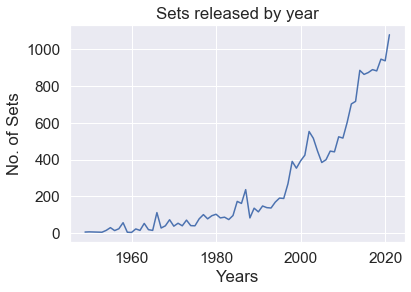

In [22]:
plt.plot(df_sets_yoy.index[:-1], df_sets_yoy.set_num[:-1])
plt.xlabel("Years")
plt.ylabel("No. of Sets")
plt.title("Sets released by year")


In [23]:
df_sets_yoy.drop(2022, axis=0).iplot(
    kind="line", y="set_num", dimensions=(800, 500), xTitle="Years", yTitle="No. of Sets", title="Sets released by year"
)


Steady growth is seen from 1950 upto early 1990s and it started to boom after 1996 as seen in the plot.  
Release dropped in year 2006 where we can see fall in the line graph and after that it's upward increasing graph.


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.  
We can do same operation with nunique on groupby but advantage of [.agg()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) is it can work on different column with different operations


In [24]:
df_theme_by_yr = df_sets.groupby("year").agg({"theme_id": pd.Series.nunique}).rename(columns={"theme_id": "n_theme"})
df_theme_by_yr


,n_theme
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2018,88
2019,76
2020,85


In [25]:
df_sets.groupby("year").nunique()["theme_id"]


year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2018    88
2019    76
2020    85
2021    74
2022    52
Name: theme_id, Length: 72, dtype: int64

As suggested by the less no. of sets in starting years, no. of themes are less than 5 in starting years too


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years.


In [26]:
df_theme_by_yr.drop(2022).iplot(
    kind="line", y="n_theme", xTitle="Year", yTitle="No. of Themes", title="No. of Themes according to year"
)


In [27]:
px.line(
    x=df_theme_by_yr.index[:-1],
    y=df_theme_by_yr["n_theme"][:-1],
    labels={"x": "Year", "y": "No. of Theme"},
    title="No. of Themes by Year",
    markers=True,
)


No. of unique themes has steady growth up to early 2000 with some ups and downs in between and got stagnant later on.  
Graph hit plateau after year 2014 and in later years no. of theme is consistent with $\plusmn$ 10


### Line Charts with Two Seperate Axes


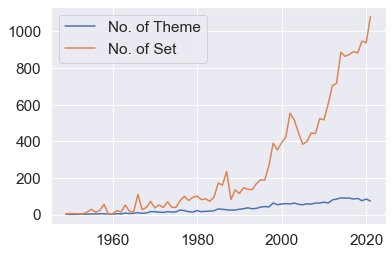

In [28]:
plt.plot(df_theme_by_yr[:-1], label="No. of Theme")
plt.plot(df_sets_yoy.index[:-1], df_sets_yoy["set_num"][:-1], label="No. of Set")
plt.legend()


In [29]:
px.line(
    x=df_theme_by_yr.index[:-1],
    y=[df_theme_by_yr["n_theme"][:-1], df_sets_yoy["set_num"][:-1]],
    labels={"variable": "Unique Number", "x": "Years", "value": "Number"},
)
# need to use graph_object inplace of express for manually setting the legend variable


From above graph it's quite difficult to figure out both graph together on one axis so we should use two axis for plotting


Text(0, 0.5, 'No. of Sets')

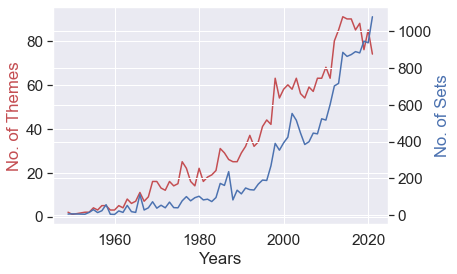

In [30]:
ax1 = plt.gca()  # get current axes
ax2 = ax1.twinx()  # will share common x-axis
ax1.plot(df_theme_by_yr[:-1], label="No. of Theme", c="r")
ax2.plot(df_sets_yoy.index[:-1], df_sets_yoy["set_num"][:-1], label="No. of Set", c="b")
ax1.set_xlabel("Years")
ax1.set_ylabel("No. of Themes", c="r")
ax2.set_ylabel("No. of Sets", c="b")


In [31]:
# need to use graph_object for secondary axis. graph_object provide refine control over the graph
df_set_theme = df_sets_yoy.copy()
df_set_theme = df_set_theme.join(df_theme_by_yr)
df_set_theme.drop(2022).iplot(
    y="n_theme", secondary_y="set_num", xTitle="Year", yTitle="No. of Theme", secondary_y_title="No. of Sets"
)


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?


In [32]:
df_sets.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [33]:
df_sets.groupby("year").mean()[["num_parts"]]


,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,15.758621
...,...
2018,194.688562
2019,202.247096
2020,225.992537


In [34]:
parts_per_set = df_sets.groupby("year").agg({"num_parts": np.mean})  # pd.DataFrame.mean
parts_per_set.head()


,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,15.758621


In [35]:
pd.options.display.precision = 2
parts_per_set.head()


,num_parts
year,
1949,99.60
1950,1.00
1953,12.50
1954,8.36
1955,15.76


In [36]:
parts_per_set.tail()


,num_parts
year,
2018,194.69
2019,202.25
2020,225.99
2021,245.21
2022,310.24


### Scatter Plots in Matplotlib


**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?


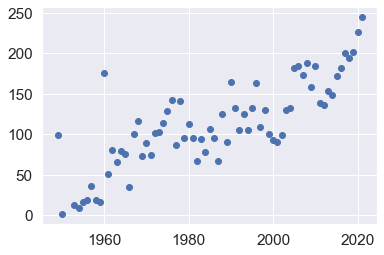

In [37]:
plt.scatter(parts_per_set.index[:-1], parts_per_set["num_parts"][:-1])


In [38]:
parts_per_set.drop(2022).iplot(
    mode="markers",
    xTitle="Years",
    yTitle="Avg. No. of Parts",
    title="Avg. No. of parts per year",
    size=8,
    dimensions=(600, 500),
)


We can conclude that no. of parts within set is increasing compare to starting years


### Number of Sets per LEGO Theme


LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?


In [39]:
df_sets["theme_id"].value_counts()


501    2111
158     830
503     607
494     492
497     482
       ... 
415       1
307       1
510       1
34        1
414       1
Name: theme_id, Length: 437, dtype: int64

The database schema:
![Data Base Schema](./assets/rebrickable_schema.png)


In [40]:
df_themes.head()


,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


theme_id in `df_sets` are id in `df_theme` which can be verified from above schema image as well.  
We can join/merge both dataframe using this id.


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has `theme_ids` which link to the `id` column in the themes.csv.


**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many `id` correspond to this name in the themes.csv? Now use these `id` and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the `theme_id` column)


In [41]:
df_themes.head()


,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [42]:
df_themes[df_themes["name"] == "Star Wars"]


,id,name,parent_id
5,18,Star Wars,1.0
78,158,Star Wars,NaN
100,209,Star Wars,207.0
130,261,Star Wars,258.0


In [43]:
df_sets[df_sets["theme_id"] == 18].sort_values("year")


,set_num,name,year,theme_id,num_parts
14590,8000-1,Pit Droid,2000,18,223
14597,8001-1,Battle Droid,2000,18,336
14608,8002-1,Destroyer Droid,2000,18,567
14630,8007-1,C-3PO,2001,18,339
14631,8008-1,Stormtrooper,2001,18,361
10913,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
14632,8009-1,R2-D2,2002,18,239
14633,8010-1,Darth Vader,2002,18,388
14644,8011-1,Jango Fett,2002,18,425
14646,8012-1,Super Battle Droid,2002,18,378


Theme with id 18 was manufactured during year 2000 to 2002.


In [44]:
df_sets[df_sets["theme_id"] == 209].sort_values("year")


,set_num,name,year,theme_id,num_parts
14558,7958-1,Star Wars Advent Calendar 2011,2011,209,267
17541,9509-1,Star Wars Advent Calendar 2012,2012,209,235
13384,75023-1,Star Wars Advent Calendar 2013,2013,209,254
13417,75056-1,Star Wars Advent Calendar 2014,2014,209,275
13451,75097-1,Star Wars Advent Calendar 2015,2015,209,291
13502,75146-1,Star Wars Advent Calendar 2016,2016,209,282
13544,75184-1,Star Wars Advent Calendar 2017,2017,209,309
13577,75213-1,Star Wars Advent Calendar 2018,2018,209,307
13616,75245-1,Star Wars Advent Calendar 2019,2019,209,280
13652,75279-1,Star Wars Advent Calendar 2020,2020,209,311


Theme with id 209 is assigned to **\*Star Wars Advent Calendar** YEAR\* which started in 2011 and released each year


Star war is long running Theme and as a result there's various ID for Star Wars corresponding to respective set


### Merging (i.e., Combining) DataFrames based on a Key


The main difference between join vs merge would be; [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) is used to combine two DataFrames on the index but not on columns whereas [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) is primarily used to specify the columns you wanted to join on, this also supports joining on indexes and combination of index and columns.

| Join Feature                   | `join()` | `merge()` |
| :----------------------------- | :------: | :-------: |
| inner                          |   Yes    |    Yes    |
| left                           |   Yes    |    Yes    |
| right                          |   Yes    |    Yes    |
| outer                          |   Yes    |    Yes    |
| cross                          |  **No**  |    Yes    |
| Join on Indices                |   Yes    |    Yes    |
| Join on Columns                |  **No**  |    Yes    |
| Left on column, right on index |   Yes    |    Yes    |
| Left on index, right on column |  **No**  |    Yes    |


In [45]:
df_sets.head()


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [46]:
df_themes.head()


,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [53]:
df_combine = pd.merge(df_sets, df_themes, left_on="theme_id", right_on="id", suffixes=("_set", "_theme"))
df_combine.head()


,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,211,1,Technic,NaN
3,1038-1,ERBIE the Robo-Car,1985,1,120,1,Technic,NaN
4,1039-1,Manual Control Set 1,1986,1,39,1,Technic,NaN


In [48]:
df_combine[df_combine["name_theme"] == "Star Wars"]


,set_num,name_set,year,theme_id,num_parts,id,name_theme,parent_id
12399,20006-1,Clone Turbo Tank,2008,158,64,158,Star Wars,NaN
12400,20007-1,Republic Attack Cruiser,2009,158,84,158,Star Wars,NaN
12401,20009-1,AT-TE Walker,2009,158,94,158,Star Wars,NaN
12402,20010-1,Republic Gunship,2009,158,94,158,Star Wars,NaN
12403,20016-1,Imperial Shuttle,2010,158,70,158,Star Wars,NaN
...,...,...,...,...,...,...,...,...
19017,75307-1,Star Wars Advent Calendar 2021,2021,209,336,209,Star Wars,207.0
19018,7958-1,Star Wars Advent Calendar 2011,2011,209,267,209,Star Wars,207.0
19019,9509-1,Star Wars Advent Calendar 2012,2012,209,235,209,Star Wars,207.0
19397,9748-1,Droid Developer Kit,1999,261,658,261,Star Wars,258.0


In [49]:
theme_count = df_combine["name_theme"].value_counts().sort_values(ascending=False)
theme_count


Gear           2111
Star Wars       854
Technic         823
Key Chain       607
Friends         510
               ... 
Universe          2
Mini              1
Legoland          1
Adventurers       1
Aquazone          1
Name: name_theme, Length: 357, dtype: int64

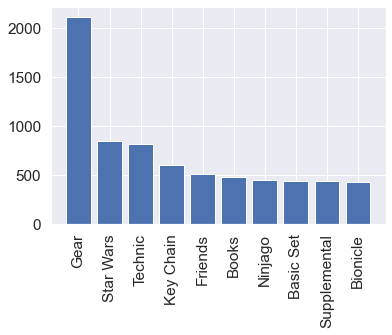

In [64]:
plt.bar(theme_count.index[:10], theme_count.values[:10])
plt.xticks(rotation=90)
plt.show()


In [77]:
theme_count.iplot(kind="bar", title="Number of Sets Manufactured by Theme", sortbars=True)


In [84]:
theme_count[:10].iplot(
    kind="bar", title="Top 10 Sets Manufactured by Theme", xTitle="Theme", yTitle="Count", theme="solar"
)


In [86]:
px.bar(
    x=theme_count.index,
    y=theme_count.values,
    title="Number of Sets Manufactured by Theme",
    labels={"x": "Year", "y": "Count"},
)
